In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.drop(122, inplace=True)

In [8]:
df.shape

(246, 14)

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
# Conditionally map new column datas

In [11]:
df.loc[:123, "Region"] = 0
df.loc[123:, "Region"] = 1

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [13]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.shape

(244, 15)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.iloc[120:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [18]:
df.columns # Unnecessary spaces in column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
df.columns = df.columns.str.strip()

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [22]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [23]:
df[df["day"] == "day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [24]:
df.drop(122, inplace=True)

In [25]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [27]:
df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [29]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [30]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [31]:
df["Classes"] = df["Classes"].str.strip()

In [34]:
#Conditionally edit columns

In [33]:
df["Classes"] = np.where(df["Classes"].str.contains("not"), 0, 1)

In [36]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [38]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


In [40]:
df["Classes"].value_counts(normalize=True) * 100 #Percentages of values

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

In [41]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


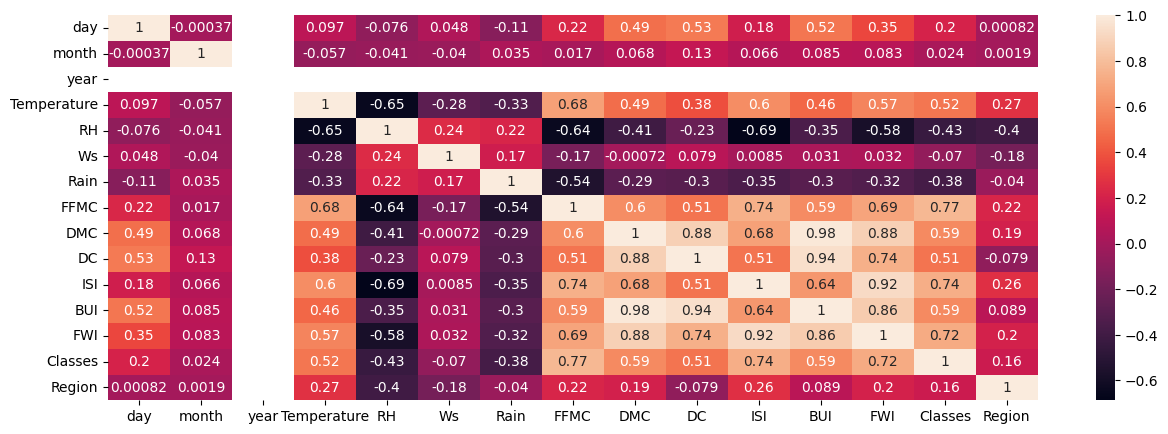

In [48]:
plt.figure(figsize=(15,5))

sns.heatmap(df.corr(), annot=True)

plt.show()

In [50]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [52]:
#features

In [59]:
X = df.drop("FWI", axis=1) #Must be a dataframe type
y = df["FWI"] #series type

In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [62]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.25)

In [65]:
X_train.shape

(182, 11)

In [68]:
#Reduncancy - İki feature'ın birbirine korelasyonu çok yüksekse birbirini çıkartabiliriz. İki benzer feature gereksizdir. İkisinin de olması bilgi tekrarı demektir. Gereksiz karmaşıklıktır.

In [69]:
#Multicollinearity - Bir değişkeni yordayan (tahmin eden) en az iki değişken arasında çok yüksek ilişkinin olması durumu

In [70]:
#İki bağımsız değişken(featurelarımız) araasında %85-95 arasında bir korelasyon var ise çıkartmak iyi olacaktır. Uzmana başvurulmalı.

In [71]:
#Tüm bunların hepsi overfitting riskini azaltmak ve modeli en iyi şekilde eğitmek içindir.

In [66]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [74]:
print(X_train.columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


In [82]:
def correlation_to_drop(df, threshold):
    corr = df.corr()

    columns_to_drop = set()

    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])

    return columns_to_drop

In [84]:
columns_to_drop = correlation_to_drop(X_train, 0.85)

In [85]:
X_train.drop(columns_to_drop, axis=1, inplace=True)
X_test.drop(columns_to_drop, axis=1, inplace=True)

In [87]:
X_train.shape

(182, 9)

In [90]:
X_test.shape

(61, 9)

In [88]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
55,36,53,19,0.0,89.2,17.1,10.0,1,0.0
6,33,54,13,0.0,88.2,9.9,6.4,1,0.0
138,29,87,15,0.4,47.4,4.2,0.2,0,1.0
123,32,71,12,0.7,57.1,2.5,0.6,0,1.0
40,33,76,14,0.0,81.1,8.1,2.6,0,0.0


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

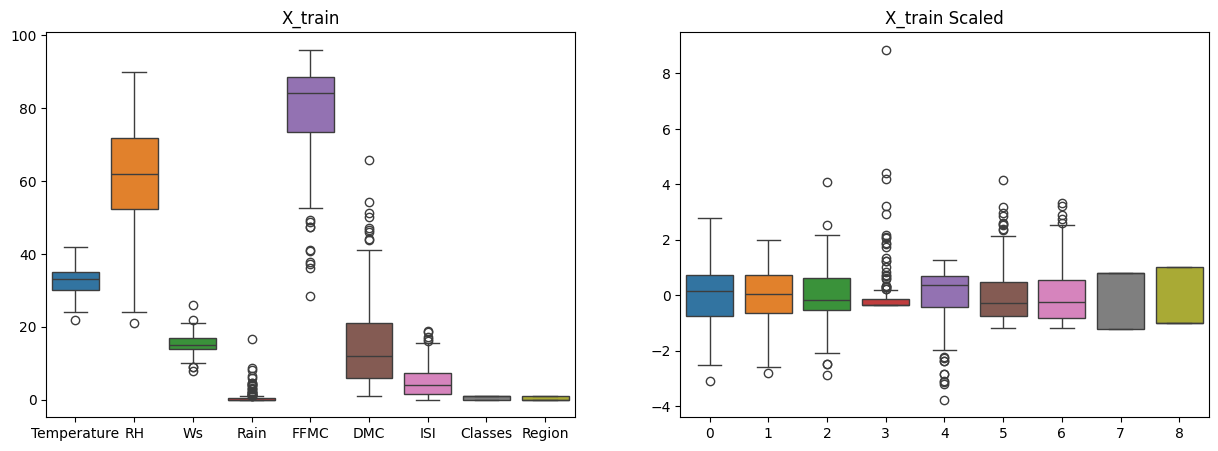

In [94]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train Scaled")

plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
linear = LinearRegression()

In [99]:
linear.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
y_pred = linear.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [104]:
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.7036011729575921
Mean Square Error: 0.8764163698605981
R2 Score: 0.9838729275348057


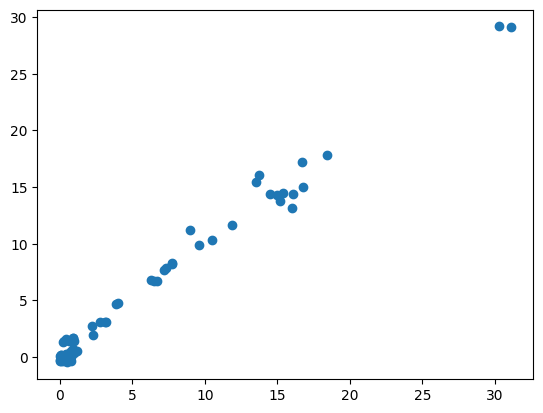

In [105]:
plt.scatter(y_test, y_pred)

plt.show()

Mean Absolute Error: 1.216272633800629
Mean Square Error: 2.6029377368132196
R2 Score: 0.9521029422229386


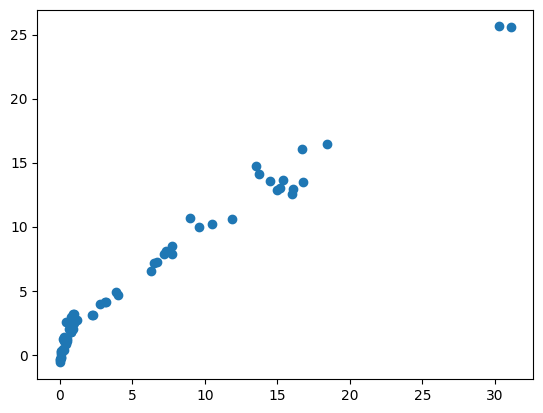

In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_lasso)

plt.show()

Mean Absolute Error: 0.7093542448703333
Mean Square Error: 0.8868348464263109
R2 Score: 0.9836812155445575


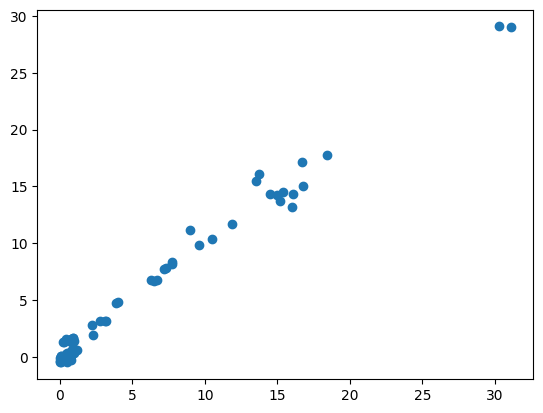

In [107]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_ridge)

plt.show()

Mean Absolute Error: 1.749328647109016
Mean Square Error: 5.569160502382824
R2 Score: 0.8975210207375391


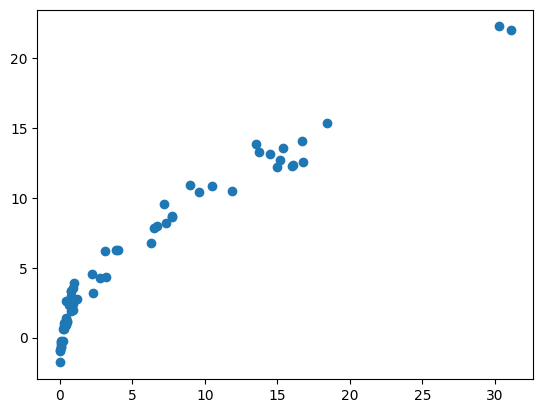

In [108]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_elastic_net)
mse = mean_squared_error(y_test, y_pred_elastic_net)
r2 = r2_score(y_test, y_pred_elastic_net)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_elastic_net)

plt.show()

In [109]:
#Lasso Cross Validation

In [110]:
from sklearn.linear_model import LassoCV

Mean Absolute Error: 0.7222308156305418
Mean Square Error: 0.8972011670293636
R2 Score: 0.9834904632842026


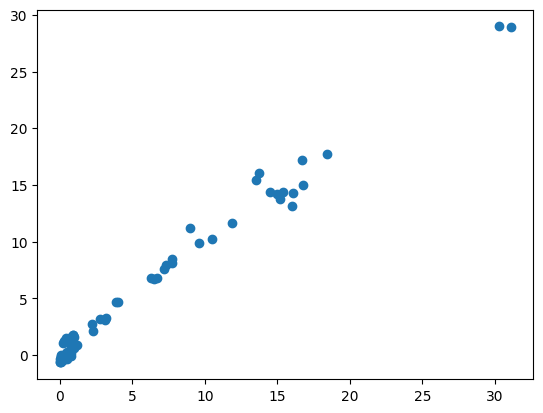

In [113]:
lasso_cv = LassoCV(cv=5) #K-fold(5 fold). default olarak 100 tane alpha(n_alphas) deneyip en iyisini bizim için bulacak

lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lasso_cv)
mse = mean_squared_error(y_test, y_pred_lasso_cv)
r2 = r2_score(y_test, y_pred_lasso_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_lasso_cv)

plt.show()

In [116]:
lasso_cv.alpha_ #Fit ettikten sonra çalışır!

np.float64(0.031548475118595085)

In [119]:
lasso_cv.alphas_ #Denenen alphalar

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

In [120]:
#Ridge Cross Validation

Mean Absolute Error: 0.7093542448703333
Mean Square Error: 0.8868348464263109
R2 Score: 0.9836812155445575


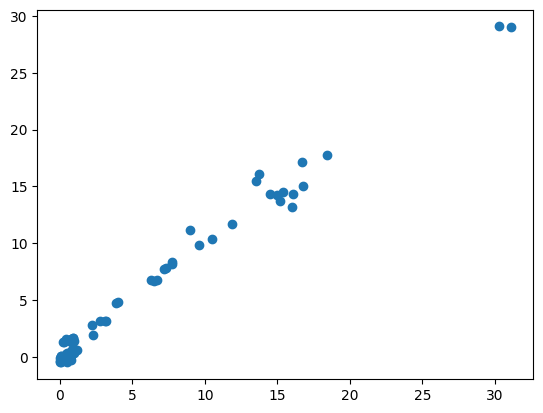

In [124]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5) #K-fold(5 fold)

ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_ridge_cv)
mse = mean_squared_error(y_test, y_pred_ridge_cv)
r2 = r2_score(y_test, y_pred_ridge_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_ridge_cv)

plt.show()

In [126]:
#ElasticNet Cross Validation

Mean Absolute Error: 0.7354284604918176
Mean Square Error: 0.9249125778630378
R2 Score: 0.9829805413498388


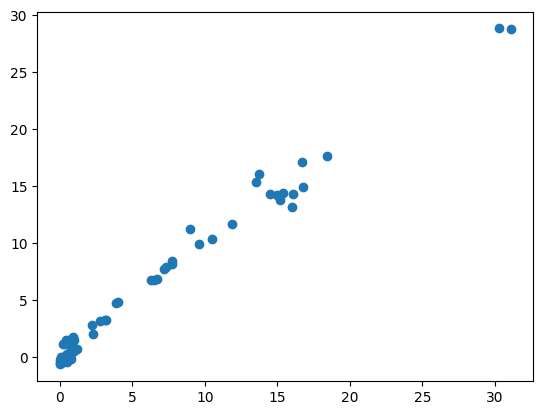

In [125]:
from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv=5) #K-fold(5 fold)

elastic_net_cv.fit(X_train_scaled, y_train)
y_pred_elastic_net_cv = elastic_net_cv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_elastic_net_cv)
mse = mean_squared_error(y_test, y_pred_elastic_net_cv)
r2 = r2_score(y_test, y_pred_elastic_net_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_elastic_net_cv)

plt.show()

In [127]:
elastic_net_cv.alphas_

array([13.59382584, 12.67764748, 11.82321647, 11.02637125, 10.28323073,
        9.5901754 ,  8.94382967,  8.34104549,  7.77888694,  7.25461599,
        6.76567915,  6.30969502,  5.8844427 ,  5.48785095,  5.11798817,
        4.77305289,  4.4513651 ,  4.15135799,  3.87157036,  3.61063947,
        3.36729446,  3.14035008,  2.928701  ,  2.73131635,  2.54723477,
        2.37555967,  2.2154549 ,  2.06614066,  1.92688969,  1.79702377,
        1.67591039,  1.56295964,  1.45762139,  1.35938258,  1.26776475,
        1.18232165,  1.10263712,  1.02832307,  0.95901754,  0.89438297,
        0.83410455,  0.77788869,  0.7254616 ,  0.67656792,  0.6309695 ,
        0.58844427,  0.5487851 ,  0.51179882,  0.47730529,  0.44513651,
        0.4151358 ,  0.38715704,  0.36106395,  0.33672945,  0.31403501,
        0.2928701 ,  0.27313164,  0.25472348,  0.23755597,  0.22154549,
        0.20661407,  0.19268897,  0.17970238,  0.16759104,  0.15629596,
        0.14576214,  0.13593826,  0.12677647,  0.11823216,  0.11